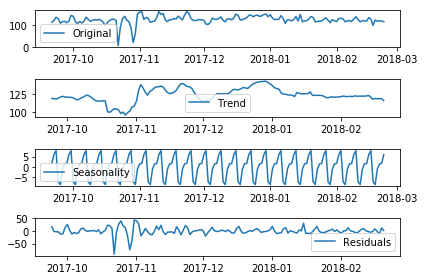

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

daily_data = pd.read_csv('daily_data.csv', parse_dates = ['date_time'], index_col = ['date_time'])
hourly_data = pd.read_csv('hourly_data.csv', index_col = ['date_time'], parse_dates = ['date_time'])
#seasonility of a week
decomp = seasonal_decompose(daily_data)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(daily_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

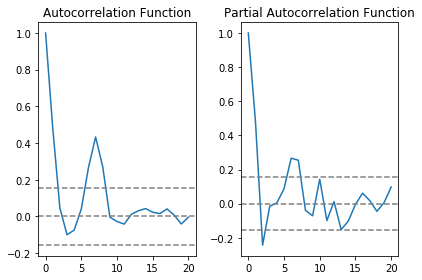

In [9]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(daily_data, nlags=20)
lag_pacf = pacf(daily_data, nlags=20, method='ols')

#plot ACF
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(daily_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(daily_data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(daily_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(daily_data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

-0.0167661028479


/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


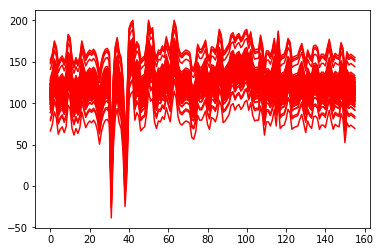

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(daily_data, order=(2,1,2))  #(p,d,q)
results_AR = model.fit(disp=-1)  
result = np.asarray(results_AR.fittedvalues)
data = np.asarray(daily_data)
plt.plot(data, color='blue')
# result = results_AR.fittedvalues + daily_data+)
plt.plot(result + data, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-daily_data)**2))